In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
# Load Data
company = 'FB'

start = dt.datetime(2012,1,1)
end = dt.datetime(2021,1,1)

data = web.DataReader(company, 'yahoo', start, end)

In [3]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train =[]
y_train =[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
# Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
66/66 [==============================] - 14s 101ms/step - loss: 0.0158
Epoch 2/25
66/66 [==============================] - 7s 103ms/step - loss: 0.0027
Epoch 3/25
66/66 [==============================] - 7s 108ms/step - loss: 0.0028
Epoch 4/25
66/66 [==============================] - 7s 101ms/step - loss: 0.0026
Epoch 5/25
66/66 [==============================] - 8s 116ms/step - loss: 0.0021
Epoch 6/25
66/66 [==============================] - 7s 108ms/step - loss: 0.0021
Epoch 7/25
66/66 [==============================] - 7s 112ms/step - loss: 0.0020
Epoch 8/25
66/66 [==============================] - 7s 101ms/step - loss: 0.0019 1s
Epoch 9/25
66/66 [==============================] - 7s 100ms/step - loss: 0.0019
Epoch 10/25
66/66 [==============================] - 7s 106ms/step - loss: 0.0020
Epoch 11/25
66/66 [==============================] - 7s 98ms/step - loss: 0.0017
Epoch 12/25
66/66 [==============================] - 7s 100ms/step - loss: 0.0020
Epoch 13/25
66/66 [===

In [5]:
''' Test the Model Accruacy on Existing Data '''

# Load Test Data
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

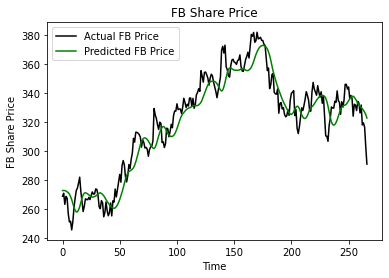

In [6]:
# Make predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot The Test Predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [7]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[319.47473]]
